In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import yfinance as yfin
from datetime import date

plt.rcParams["figure.figsize"] = (16, 9)

In [22]:
start = date(2020, 11, 2)
end = date(2025, 10, 31)
df = yfin.download(["AAPL"], start=start, end=end, auto_adjust=False)["Adj Close"]
df.head()

[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2020-11-02,105.700050
2020-11-03,107.322929
2020-11-04,111.705620
2020-11-05,115.670479
2020-11-06,115.539062


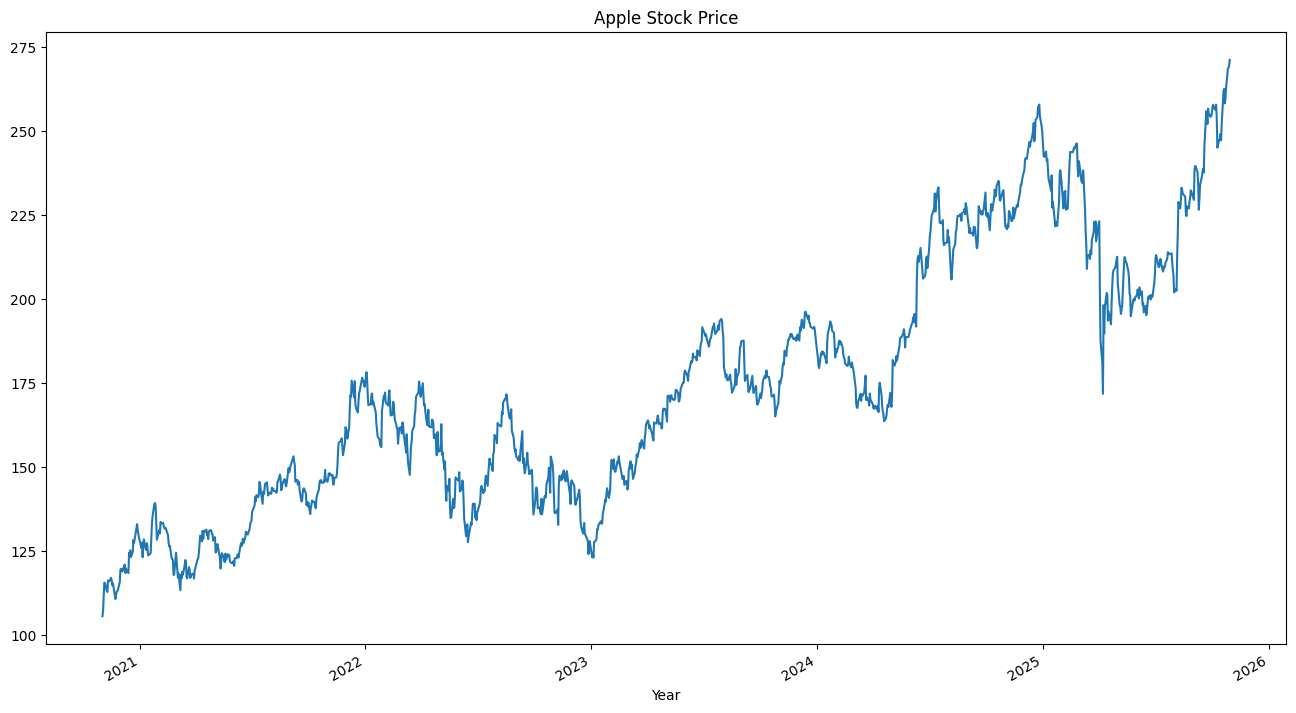

In [23]:
df["AAPL"].dropna().plot()
plt.title("Apple Stock Price")
plt.xlabel("Year")
plt.show()

In [24]:
import statsmodels.api as sm

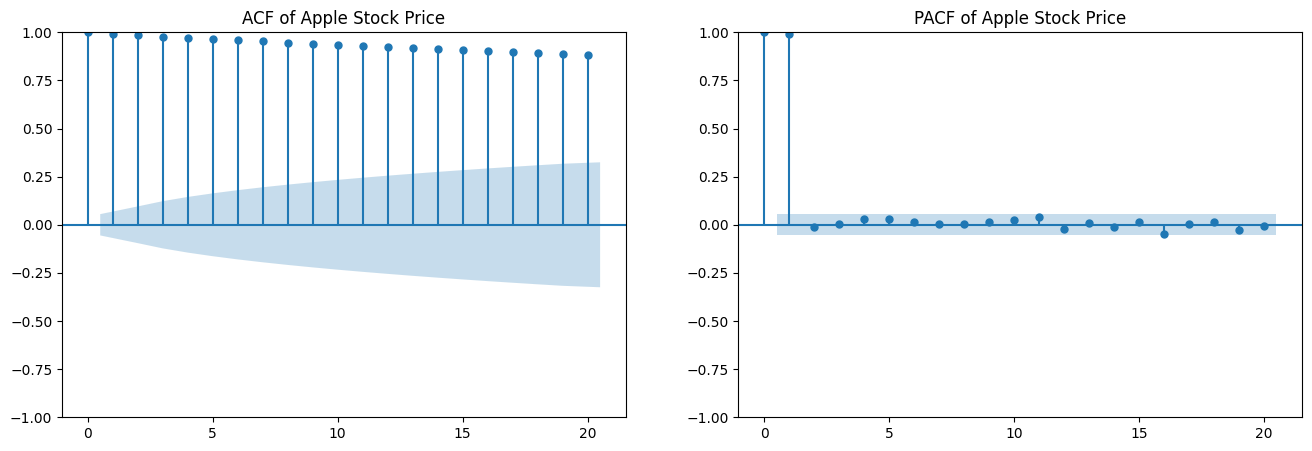

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))
sm.graphics.tsa.plot_acf(
    df["AAPL"],
    title="ACF of Apple Stock Price",
    lags=20, ax=ax1
    )

sm.graphics.tsa.plot_pacf(
    df["AAPL"],
    title="PACF of Apple Stock Price",
    lags=20, ax=ax2
    )
plt.show()

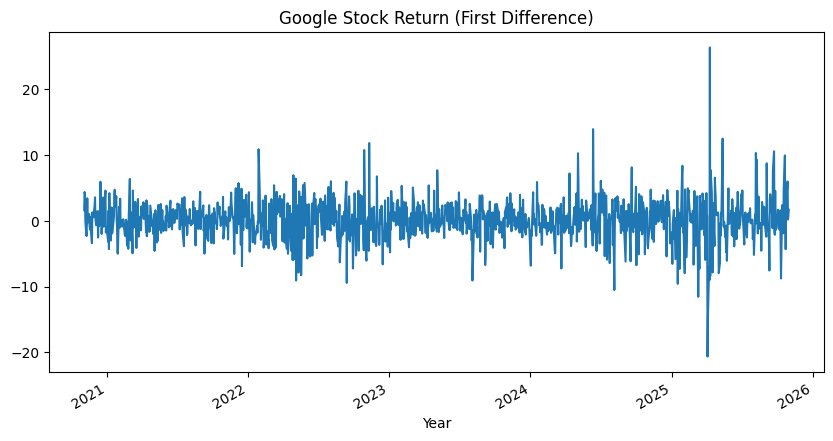

In [26]:
plt.figure(figsize=(10,5))
df["AAPL"].diff().dropna().plot()
plt.title("Google Stock Return (First Difference)")
plt.xlabel("Year")
plt.show()

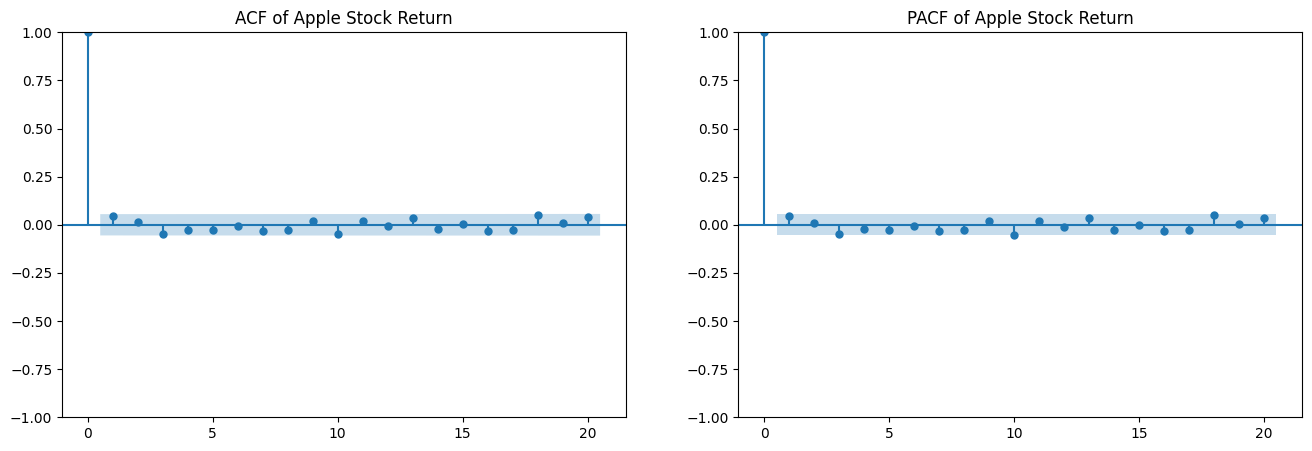

In [27]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(16,5))
sm.graphics.tsa.plot_acf(
    df["AAPL"].diff().dropna(),
    title="ACF of Apple Stock Return",
    lags=20, ax=ax1
    )

sm.graphics.tsa.plot_pacf(
    df["AAPL"].diff().dropna(),
    title="PACF of Apple Stock Return",
    lags=20, ax=ax2
    )
plt.show()

In [28]:
import statsmodels

model = statsmodels.tsa.arima.model.ARIMA(df.AAPL, order=(0, 1, 0)).fit()
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                 1255
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -3188.333
Date:                Wed, 10 Dec 2025   AIC                           6378.666
Time:                        12:37:59   BIC                           6383.800
Sample:                             0   HQIC                          6380.596
                               - 1255                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.4610      0.175     53.943      0.000       9.117       9.805
Ljung-Box (L1) (Q):                   2.39   Jarque-Bera (JB):              2773.82
Prob(Q):                              0.12   Pr

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


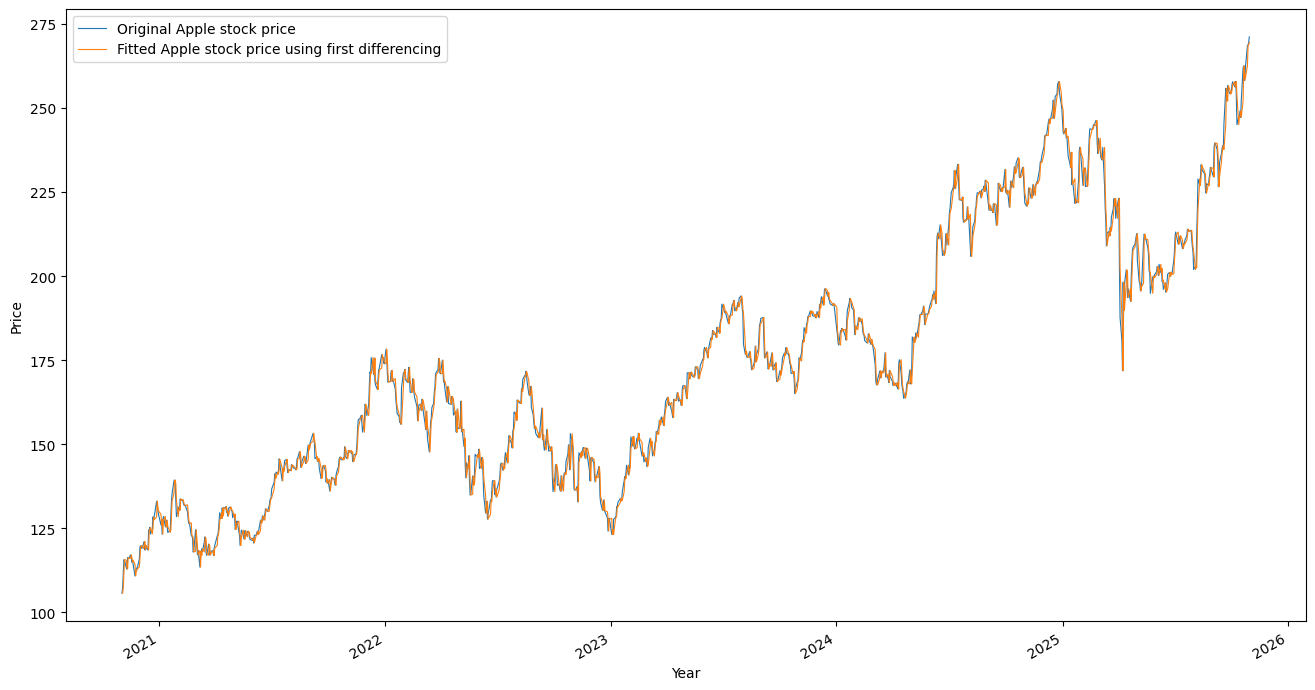

In [29]:
# Plot Apple vs fitted Apple stock prices
mod_res = model.resid
model_fit = df["AAPL"] - mod_res

model_fit = model_fit[1:]  # skip first element since the model lost one data point

df["AAPL"].plot(linewidth=0.8, label="Original Apple stock price")
model_fit.plot(linewidth=0.8, label="Fitted Apple stock price using first differencing")
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.show()



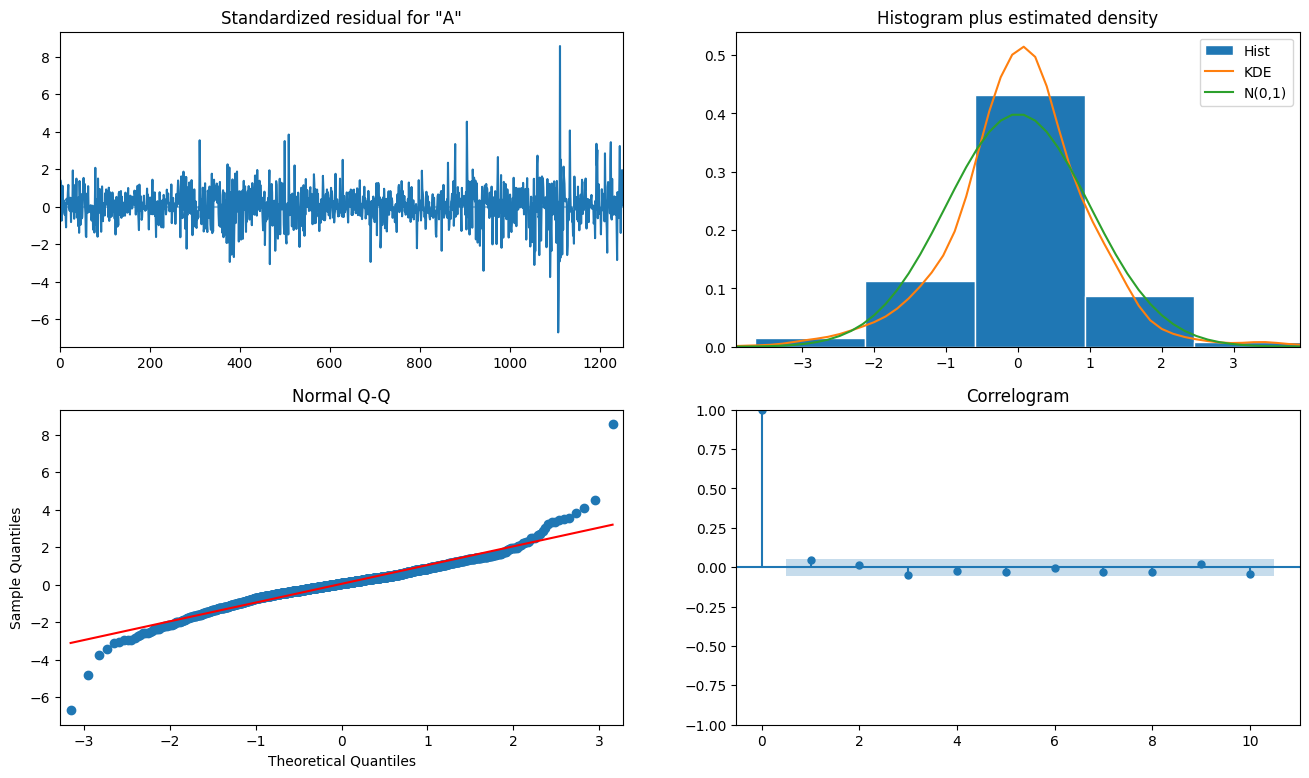

In [30]:
# Diagnostic Report for ARIMA(0,1,0) Model
model.plot_diagnostics()
plt.show()

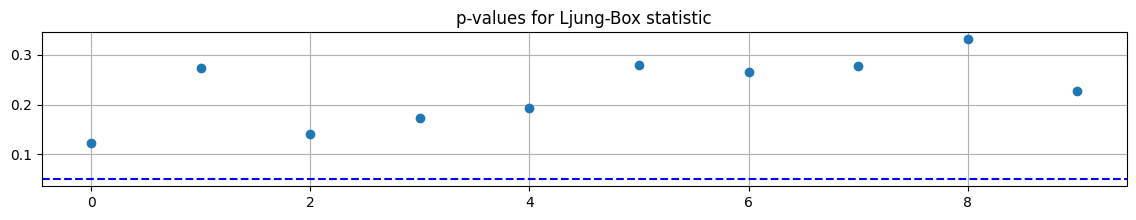

In [31]:
# Ljung-Box test for no serial correlation of standardized residuals
lb_test = model.test_serial_correlation(
    method="ljungbox", df_adjust=True, lags=None
)

# plot Ljung-Box test p-values and 0.05 significance line
plt.figure(figsize=(14, 2))
plt.plot(lb_test[0][1], linestyle="", marker="o")
plt.axhline(y=0.05, color="blue", linestyle="--")
plt.title("p-values for Ljung-Box statistic")
plt.grid()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


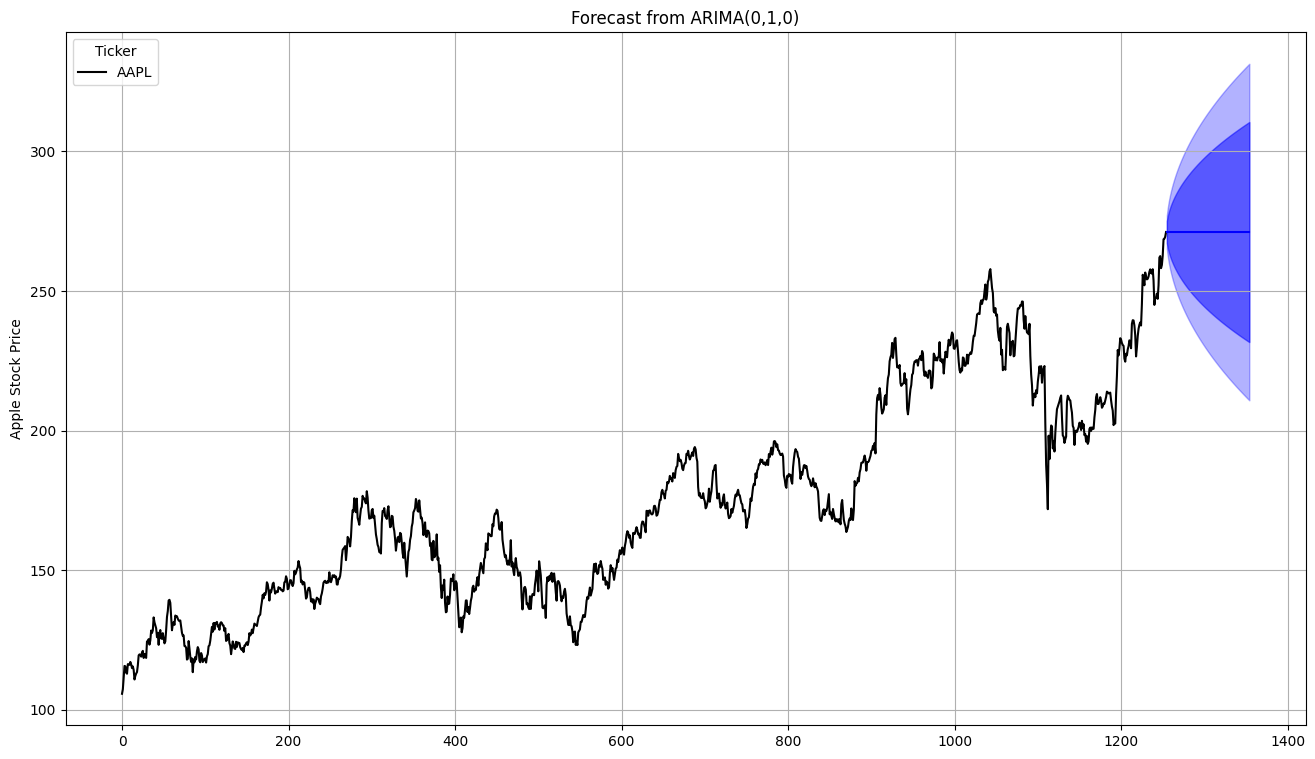

In [32]:
# Forecast Plot of ARIMA(0,1,0) with 95% Confidence Interval

# Plot Google data
ffx = df.copy()
ffx.index = [i for i in range(len(ffx))]  # Set numeric index
ffx.plot(ylabel="Apple Stock Price", title="Forecast from ARIMA(0,1,0)", color="k")

# get forecast data for next 100 steps
forecast = model.get_forecast(steps=100)
forecast_mean = forecast.predicted_mean  # mean of forecast data
conf_int95 = forecast.conf_int(alpha=0.05)  # 95% confidence interval
conf_int80 = forecast.conf_int(alpha=0.2)  # 80% confidence interval

# plot mean forecast and 95% and 80% confidence intervals
plt.plot(forecast_mean, c="b")
plt.fill_between(
    conf_int95.index,
    conf_int95["lower AAPL"],
    conf_int95["upper AAPL"],
    color="b",
    alpha=0.3,
)
plt.fill_between(
    conf_int80.index,
    conf_int80["lower AAPL"],
    conf_int80["upper AAPL"],
    color="b",
    alpha=0.5,
)
plt.grid()
plt.show()